   #                      COVID-19 DATA ANALYSIS

# Gathering Data

In [30]:
# import python libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")

In [31]:
# Grab Worldwide covid-19 data website
page = requests.get("https://www.worldometers.info/coronavirus/")

#Check out whether the website can be accessible for scraping
page.status_code

200

In [32]:
# Parse Worldwide data from 
soup = BeautifulSoup(page.content, "lxml")
items = soup.find("tbody")


In [33]:

data = [item.text for item in items.find_all('td')]
data_chunksize = [data[i:i + 13] for i in range(0, len(data), 13)]
data_chunksize = data_chunksize[8:]
country = [i[0] for i in data_chunksize]
total_cases = [i[1] for i in data_chunksize]
new_cases = [i[2] for i in data_chunksize]

total_deaths = [i[3] for i in data_chunksize]
new_deaths = [i[4] for i in data_chunksize]
total_recovered = [i[5] for i in data_chunksize]

active_cases = [i[6] for i in data_chunksize]
critical = [i[7] for i in data_chunksize]
total_cases_per_1M = [i[8] for i in data_chunksize]

deaths_per_1M = [i[9] for i in data_chunksize]
total_tests = [i[10] for i in data_chunksize]
tests_per_1M = [i[11] for i in data_chunksize]
continent = [i[12] for i in data_chunksize]


In [34]:
worldwide = pd.DataFrame({"Country" : country,
                          "Continent" :continent,
                          "Total Cases" : total_cases,
                          "New Cases" : new_cases,
                          "Total Deaths" : total_deaths,
                          "New Deaths" : new_deaths,
                          "Total Recovered" : total_recovered,
                          "Active Cases" : active_cases, 
                          "Serious/Critical" : critical, 
                          "Total Cases/1M pop" : total_cases_per_1M,
                          "Deaths/1M pop" : deaths_per_1M,
                          "Total Tests" : total_tests, 
                          "Tests/1M pop" : tests_per_1M})

In [35]:
# Grab USA covid-19 data website
page_1 = requests.get("https://www.worldometers.info/coronavirus/country/us/")

# Parse USA data from HTML file
soup_1 = BeautifulSoup(page_1.content, "lxml")
items_1 = soup_1.find("tbody")

data_1 = [item_1.text.replace('\n', "").strip() for item_1 in items_1.find_all('td')]
data_chunksize_1 = [data_1[i:i + 12] for i in range(0, len(data_1), 12)]

usa_state = [i[0] for i in data_chunksize_1]
total_cases_1 = [i[1] for i in data_chunksize_1]
new_cases_1 = [i[2] for i in data_chunksize_1]

total_deaths_1 = [i[3] for i in data_chunksize_1]
new_deaths_1 = [i[4] for i in data_chunksize_1]
active_cases_1 = [i[5] for i in data_chunksize_1]

total_cases_per_1M_1 = [i[6] for i in data_chunksize_1]
deaths_per_1M_1 = [i[7] for i in data_chunksize_1]

total_tests_1 = [i[8] for i in data_chunksize_1]
tests_per_1M_1 = [i[9] for i in data_chunksize_1]



In [36]:
usa = pd.DataFrame({"USA State" : usa_state,
                  "Total Cases" : total_cases_1,
                  "New Cases" : new_cases_1,
                  "Total Deaths" : total_deaths_1,
                  "New Deaths" : new_deaths_1,
                  "Active Cases" : active_cases_1,  
                  "Total Cases/1M pop" : total_cases_per_1M_1,
                  "Deaths/1M pop" : deaths_per_1M_1,
                  "Total Tests" : total_tests_1, 
                  "Tests/1M pop" : tests_per_1M_1})

## Assessing Data

In [37]:
# Display the first 5 rows of the worldwide data
worldwide.head(10)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,"1,367,638",,"80,787",,"256,336","1,030,515","16,514","4,132",244,"9,444,525","28,533"
1,Spain,Europe,"264,663",,"26,621",,"176,439","61,603","1,650","5,661",569,"2,467,761","52,781"
2,UK,Europe,"219,183",,"31,855",,N/A,"186,984","1,559","3,229",469,"1,821,280","26,829"
3,Italy,Europe,"219,070",,"30,560",,"105,186","83,324","1,027","3,623",505,"2,565,912","42,439"
4,Russia,Europe,"209,688",,"1,915",,"34,306","173,467","2,300","1,437",13,"5,448,463","37,335"
5,France,Europe,"176,970",,"26,380",,"56,217","94,373","2,776","2,711",404,"1,384,633","21,213"
6,Germany,Europe,"171,879",,"7,569",,"145,600","18,710","1,581","2,051",90,"2,755,770","32,891"
7,Brazil,South America,"162,699",,"11,123",,"64,957","86,619","8,318",765,52,"339,552","1,597"
8,Turkey,Asia,"138,657",,"3,786",,"92,691","42,180","1,154","1,644",45,"1,370,598","16,251"
9,Iran,Asia,"107,603",,"6,640",,"86,143","14,820","2,675","1,281",79,"586,699","6,985"


In [38]:

worldwide.tail()

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
209,St. Barth,North America,6,,,,6,0,,607,,,
210,Western Sahara,Africa,6,,,,5,1,,10,,,
211,Anguilla,North America,3,,,,3,0,,200,,,
212,Saint Pierre Miquelon,North America,1,,,,,1,,173,,,
213,China,Asia,"82,918",+17,"4,633",,"78,144",141,9,58,3,,


In [39]:
# Display the first 5 rows of the USA data
usa.head()

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA Total,"1,367,638",,"80,787",,"1,030,515","4,132",244,"9,444,525","28,533"
1,New York,"345,406",,"26,812",,"260,494","17,755","1,378","1,185,460","60,938"
2,New Jersey,"140,008",,"9,264",,"129,209","15,763","1,043","415,969","46,832"
3,Massachusetts,"77,793",,"4,979",,"50,666","11,287",722,"388,389","56,349"
4,Illinois,"77,741",,"3,406",,"73,690","6,135",269,"429,984","33,932"


In [40]:
# Number of countries and USA states affected by covid-19 respectively
print("The number worldwide countries in this dataset is {}".format(worldwide.shape[0]))
print("The number of USA States and territories in this dataset is {}".format(usa.shape[0]))

The number worldwide countries in this dataset is 214
The number of USA States and territories in this dataset is 52


In [41]:
# Show the brief summary of  worldwide data
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             214 non-null    object
 1   Continent           214 non-null    object
 2   Total Cases         214 non-null    object
 3   New Cases           214 non-null    object
 4   Total Deaths        214 non-null    object
 5   New Deaths          214 non-null    object
 6   Total Recovered     214 non-null    object
 7   Active Cases        214 non-null    object
 8   Serious/Critical    214 non-null    object
 9   Total Cases/1M pop  214 non-null    object
 10  Deaths/1M pop       214 non-null    object
 11  Total Tests         214 non-null    object
 12  Tests/1M pop        214 non-null    object
dtypes: object(13)
memory usage: 21.9+ KB


In [42]:
# Show the brief summary of  USA dataset
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   USA State           52 non-null     object
 1   Total Cases         52 non-null     object
 2   New Cases           52 non-null     object
 3   Total Deaths        52 non-null     object
 4   New Deaths          52 non-null     object
 5   Active Cases        52 non-null     object
 6   Total Cases/1M pop  52 non-null     object
 7   Deaths/1M pop       52 non-null     object
 8   Total Tests         52 non-null     object
 9   Tests/1M pop        52 non-null     object
dtypes: object(10)
memory usage: 4.2+ KB


# Cleaning Worldwide Dataset

In [43]:
# Strip "+" from "New Cases" and "New Deaths" columns
worldwide["New Cases"] = worldwide["New Cases"].str.strip("+")
worldwide["New Deaths"] = worldwide["New Deaths"].str.strip("+")
worldwide.head(3)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,"1,367,638",,"80,787",,"256,336","1,030,515","16,514","4,132",244,"9,444,525","28,533"
1,Spain,Europe,"264,663",,"26,621",,"176,439","61,603","1,650","5,661",569,"2,467,761","52,781"
2,UK,Europe,"219,183",,"31,855",,N/A,"186,984","1,559","3,229",469,"1,821,280","26,829"


In [44]:
# Remove "," from column values and strip off white spaces
for col in worldwide.columns:
  worldwide[col]= worldwide[col].str.replace(",", "").str.strip()


In [45]:
# Replace empty cells with zero(0)
for col in worldwide.columns:
    worldwide[col].replace("", 0, inplace=True)

In [46]:
worldwide["Total Recovered"].unique()

array(['256336', '176439', 'N/A', '105186', '34306', '56217', '145600',
       '64957', '92691', '86143', '32096', '21349', '20969', '13642',
       '11457', '23100', '8063', '26600', '3433', '13112', '2549', '4971',
       '2721', '17110', '6406', '2753', '4804', '11430', '5698', '13991',
       '8127', '7051', '3060', '2650', '2698', '2705', '9632', '1924',
       '8217', '2763', '3006', '4173', '2075', '2729', '4687', '4474',
       '32', '6167', '5025', '2554', '1757', '4000', '2678', '1941',
       '2070', '1958', '558', '778', '378', '3586', '1117', '1325', '933',
       '2794', '1734', '1374', '1465', '273', '1650', '1881', '1764',
       '714', '1106', '203', '444', '1773', '1193', '750', '650', '794',
       '1136', '1386', '828', '256', '941', '149', '847', '118', '110',
       '982', '700', '492', '675', '136', '464', '401', '293', '321',
       '234', '29', '624', '501', '550', '577', '26', '165', '651', '517',
       '351', '239', '309', '126', 0, '447', '389', '183', '90'

In [47]:
# Replace "N/A" with zero(0)
for col in worldwide.columns:
    worldwide[col].replace("N/A", 0, inplace=True)

In [48]:
worldwide.isnull().sum()

Country               0
Continent             0
Total Cases           0
New Cases             0
Total Deaths          0
New Deaths            0
Total Recovered       0
Active Cases          0
Serious/Critical      0
Total Cases/1M pop    0
Deaths/1M pop         0
Total Tests           0
Tests/1M pop          0
dtype: int64

In [49]:
# Change all datatpyes of worldwide dataset to int except "Country" column
worldwide = worldwide.astype({'New Cases' : int,
                              'Total Cases' : int, 
                              'Total Deaths' : int,
                              'New Deaths' : int,
                              'Total Recovered' : int,
                              'Active Cases' : int, 
                              'Serious/Critical' : int, 
                              'Total Cases/1M pop' : float,
                              'Deaths/1M pop' : float,
                              'Total Tests' : int, 
                              'Tests/1M pop' : float})


In [50]:
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             214 non-null    object 
 1   Continent           214 non-null    object 
 2   Total Cases         214 non-null    int32  
 3   New Cases           214 non-null    int32  
 4   Total Deaths        214 non-null    int32  
 5   New Deaths          214 non-null    int32  
 6   Total Recovered     214 non-null    int32  
 7   Active Cases        214 non-null    int32  
 8   Serious/Critical    214 non-null    int32  
 9   Total Cases/1M pop  214 non-null    float64
 10  Deaths/1M pop       214 non-null    float64
 11  Total Tests         214 non-null    int32  
 12  Tests/1M pop        214 non-null    float64
dtypes: float64(3), int32(8), object(2)
memory usage: 15.2+ KB


In [51]:
# Drop continent column with 0 values
worldwide =worldwide[worldwide['Continent']!= 0]


In [52]:
# Sort values by "Total Cases" column
worldwide.sort_values("Total Cases", ascending= False, inplace= True)

# reset index 
worldwide.reset_index(drop= True, inplace=True)

# Display the first 10 rows of dataset
worldwide.head(10)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,1367638,0,80787,0,256336,1030515,16514,4132.0,244.0,9444525,28533.0
1,Spain,Europe,264663,0,26621,0,176439,61603,1650,5661.0,569.0,2467761,52781.0
2,UK,Europe,219183,0,31855,0,0,186984,1559,3229.0,469.0,1821280,26829.0
3,Italy,Europe,219070,0,30560,0,105186,83324,1027,3623.0,505.0,2565912,42439.0
4,Russia,Europe,209688,0,1915,0,34306,173467,2300,1437.0,13.0,5448463,37335.0
5,France,Europe,176970,0,26380,0,56217,94373,2776,2711.0,404.0,1384633,21213.0
6,Germany,Europe,171879,0,7569,0,145600,18710,1581,2051.0,90.0,2755770,32891.0
7,Brazil,South America,162699,0,11123,0,64957,86619,8318,765.0,52.0,339552,1597.0
8,Turkey,Asia,138657,0,3786,0,92691,42180,1154,1644.0,45.0,1370598,16251.0
9,Iran,Asia,107603,0,6640,0,86143,14820,2675,1281.0,79.0,586699,6985.0


In [53]:
# Export data as csv file
worldwide.to_csv("worldwide_covid19.csv", index=False)

In [54]:
# Rename column headers and convert to lowercase
worldwide.columns = worldwide.columns.str.replace("/", " ")
worldwide.columns = worldwide.columns.str.replace(" ", "_").str.lower()

In [55]:
worldwide.set_index("country", inplace=True)

In [56]:
worldwide.head(3)

,continent,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,total_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
country,,,,,,,,,,,,
USA,North America,1367638,0,80787,0,256336,1030515,16514,4132.0,244.0,9444525,28533.0
Spain,Europe,264663,0,26621,0,176439,61603,1650,5661.0,569.0,2467761,52781.0
UK,Europe,219183,0,31855,0,0,186984,1559,3229.0,469.0,1821280,26829.0


# Cleaning USA Dataset

In [57]:
# Remove "USA Total" record from dataset
usa = usa[usa["USA State"] != "USA Total"]
usa.head(10)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,"345,406",,"26,812",,"260,494","17,755","1,378","1,185,460","60,938"
2,New Jersey,"140,008",,"9,264",,"129,209","15,763","1,043","415,969","46,832"
3,Massachusetts,"77,793",,"4,979",,"50,666","11,287",722,"388,389","56,349"
4,Illinois,"77,741",,"3,406",,"73,690","6,135",269,"429,984","33,932"
5,California,"67,917",,"2,717",,"54,220","1,719",69,"958,161","24,250"
6,Pennsylvania,"60,056",,"3,823",,"55,133","4,691",299,"293,737","22,945"
7,Michigan,"47,138",,"4,551",,"19,901","4,720",456,"294,411","29,480"
8,Florida,"40,596",,"1,721",,"37,829","1,890",80,"648,382","30,189"
9,Texas,"39,890",,"1,133",,"15,168","1,376",39,"513,978","17,726"
10,Connecticut,"33,554",,"2,967",,"30,522","9,411",832,"130,192","36,517"


In [58]:
# Strip "+" from "New Cases" and "New Deaths" columns
usa["New Cases"] = usa["New Cases"].str.strip("+")
usa["New Deaths"] = usa["New Deaths"].str.strip("+")



In [59]:
# Remove "," from column values and strip off white spaces
for col in usa.columns:
  usa[col]= usa[col].str.replace(",", "").str.strip()
usa.head(3) 

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,345406,,26812,,260494,17755,1378,1185460,60938
2,New Jersey,140008,,9264,,129209,15763,1043,415969,46832
3,Massachusetts,77793,,4979,,50666,11287,722,388389,56349


In [60]:
# Replace empty cells with zero(0)
for col in usa.columns:
  usa[col].replace("", 0, inplace = True)

In [61]:
usa["Tests/1M pop"].unique()

array(['60938', '46832', '56349', '33932', '24250', '22945', '29480',
       '30189', '17726', '36517', '22938', '26454', '46436', '20800',
       '17526', '18506', '18073', '32683', '38346', '18319', '23509',
       '86102', '19698', '18924', '19817', '18826', '26209', '30912',
       '23942', '16404', '18022', '31875', '19451', '41899', '45699',
       '23247', '48882', '24228', '22867', '27009', '17889', '25589',
       '17885', '58878', '17482', '35089', '32129', '23181', '26635',
       '20307', '37406'], dtype=object)

In [62]:
# Change all datatpyes of worldwide dataset to int except "USA State" column
usa = usa.astype({"Total Cases" : int,
              "New Cases" : int,
              "Total Deaths" : int,
              "New Deaths" : int,
              "Active Cases" : int,  
              "Total Cases/1M pop" : float,
              "Deaths/1M pop" : float,
              "Total Tests" : int, 
              "Tests/1M pop" : float})

In [63]:
# Check out the conversion of dtypes
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USA State           51 non-null     object 
 1   Total Cases         51 non-null     int32  
 2   New Cases           51 non-null     int32  
 3   Total Deaths        51 non-null     int32  
 4   New Deaths          51 non-null     int32  
 5   Active Cases        51 non-null     int32  
 6   Total Cases/1M pop  51 non-null     float64
 7   Deaths/1M pop       51 non-null     float64
 8   Total Tests         51 non-null     int32  
 9   Tests/1M pop        51 non-null     float64
dtypes: float64(3), int32(6), object(1)
memory usage: 3.2+ KB


In [64]:
# Sort values by "Total Cases" column
usa.sort_values("Total Cases", ascending= False, inplace=True)

# Display the first 10 rows of dataset
usa.head(10)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,345406,0,26812,0,260494,17755.0,1378.0,1185460,60938.0
2,New Jersey,140008,0,9264,0,129209,15763.0,1043.0,415969,46832.0
3,Massachusetts,77793,0,4979,0,50666,11287.0,722.0,388389,56349.0
4,Illinois,77741,0,3406,0,73690,6135.0,269.0,429984,33932.0
5,California,67917,0,2717,0,54220,1719.0,69.0,958161,24250.0
6,Pennsylvania,60056,0,3823,0,55133,4691.0,299.0,293737,22945.0
7,Michigan,47138,0,4551,0,19901,4720.0,456.0,294411,29480.0
8,Florida,40596,0,1721,0,37829,1890.0,80.0,648382,30189.0
9,Texas,39890,0,1133,0,15168,1376.0,39.0,513978,17726.0
10,Connecticut,33554,0,2967,0,30522,9411.0,832.0,130192,36517.0


In [65]:
# Export data as csv file
usa.to_csv("united_states_covid19.csv", index= False)

In [66]:
# Rename column headers and convert to lowercase
usa.columns = usa.columns.str.replace("/", " ")
usa.columns = usa.columns.str.replace(" ", "_").str.lower()

In [67]:
usa.head(2)

,usa_state,total_cases,new_cases,total_deaths,new_deaths,active_cases,total_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
1,New York,345406,0,26812,0,260494,17755.0,1378.0,1185460,60938.0
2,New Jersey,140008,0,9264,0,129209,15763.0,1043.0,415969,46832.0


# Analysis

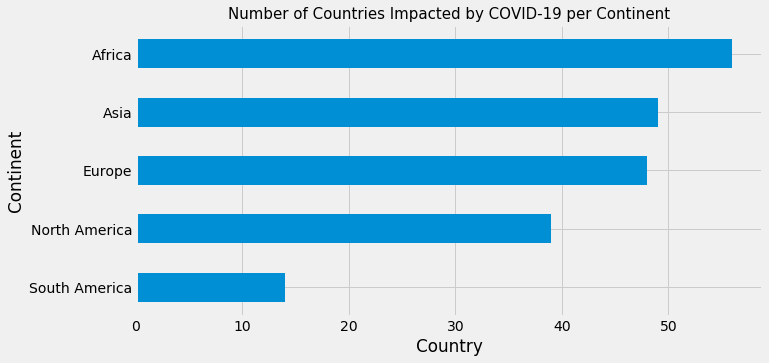

In [68]:
# Filter out the continent column
plt.figure(figsize= (10, 5))
worldwide['continent'].value_counts().sort_values()[1:].plot.barh()
plt.xlabel('Country')
plt.ylabel('Continent')
plt.title('Number of Countries Impacted by COVID-19 per Continent', fontsize = 15);

### Which continent has the highest total cases, total deaths and total recovered?

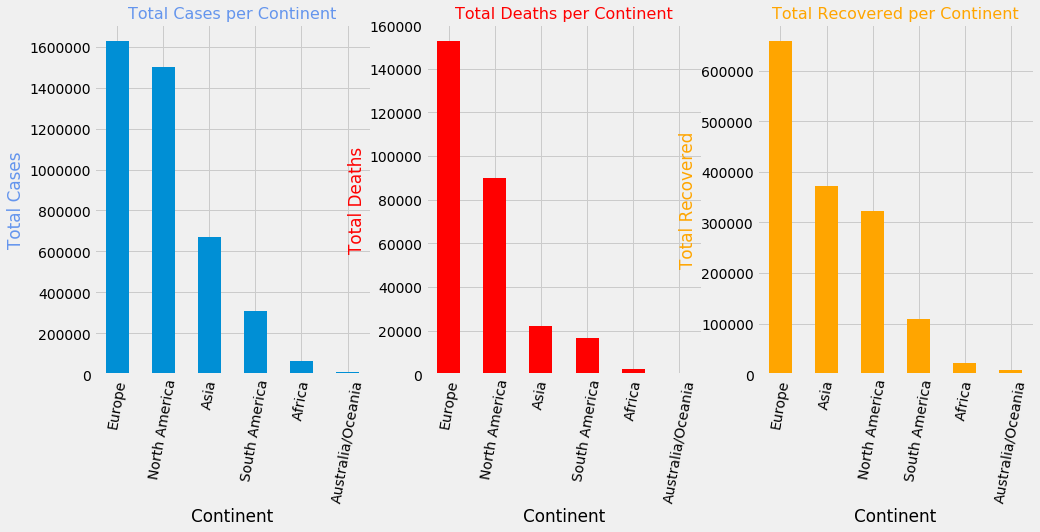

In [69]:

con =worldwide.groupby('continent').sum()
plt.figure(figsize= (15, 6))

# Total cases
plt.subplot(1,3, 1)
con.total_cases.sort_values(ascending = False).plot.bar()
plt.xticks(rotation = 80)
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.xlabel('Continent')
plt.title('Total Cases per Continent', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
con.total_deaths.sort_values(ascending = False).plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.ylabel('Total Deaths', color = 'r')
plt.xlabel('Continent')
plt.title('Total Deaths per Continent', fontsize= 16, color = 'r')

# Total recovered
plt.subplot(1,3, 3)
con.total_recovered.sort_values(ascending = False).plot.bar(color = 'orange')
plt.xticks(rotation = 80)
plt.ylabel('Total Recovered', color = 'orange')
plt.xlabel('Continent')
plt.title('Total Recovered per Continent', fontsize= 16, color = 'orange' );

### What are the top 10 countries in the world with the highest total cases, total deaths and total recovered?

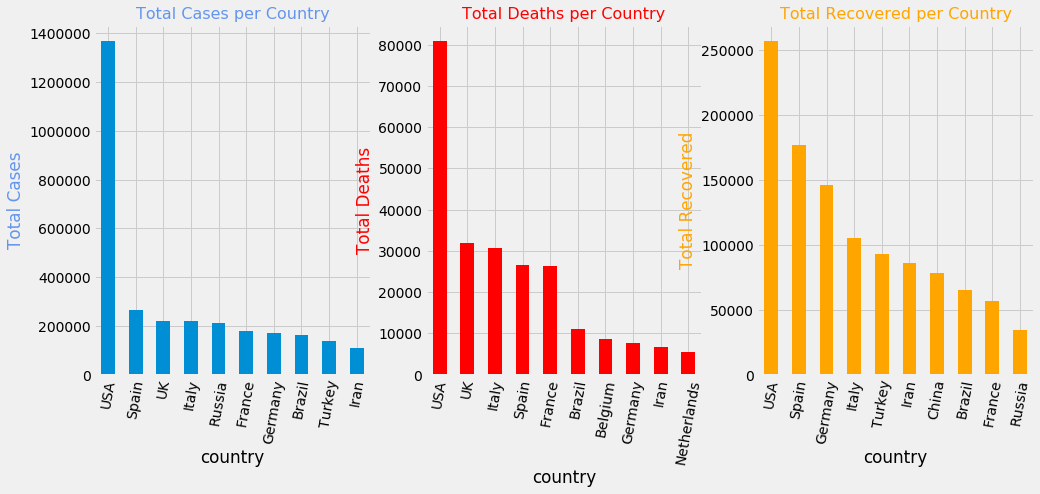

In [70]:
plt.figure(figsize= (15, 6))

# Total cases
plt.subplot(1,3, 1)
worldwide["total_cases"].head(10).plot.bar()
plt.xticks(rotation = 80)
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.title('Total Cases per Country', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
worldwide.total_deaths.sort_values(ascending = False)[:10].plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.ylabel('Total Deaths', color = 'r')
plt.title('Total Deaths per Country', fontsize= 16, color = 'r')

# Total recovered
plt.subplot(1,3, 3)
worldwide.total_recovered.sort_values(ascending = False)[:10].plot.bar(color = 'orange')
plt.xticks(rotation = 80)
plt.ylabel('Total Recovered', color = 'orange')
plt.title('Total Recovered per Country', fontsize= 16, color = 'orange' );

### What are the top 10  USA States with the highest total cases and total deaths ?

In [71]:
# set 'usa_state' column as an index
usa.set_index('usa_state', inplace= True)

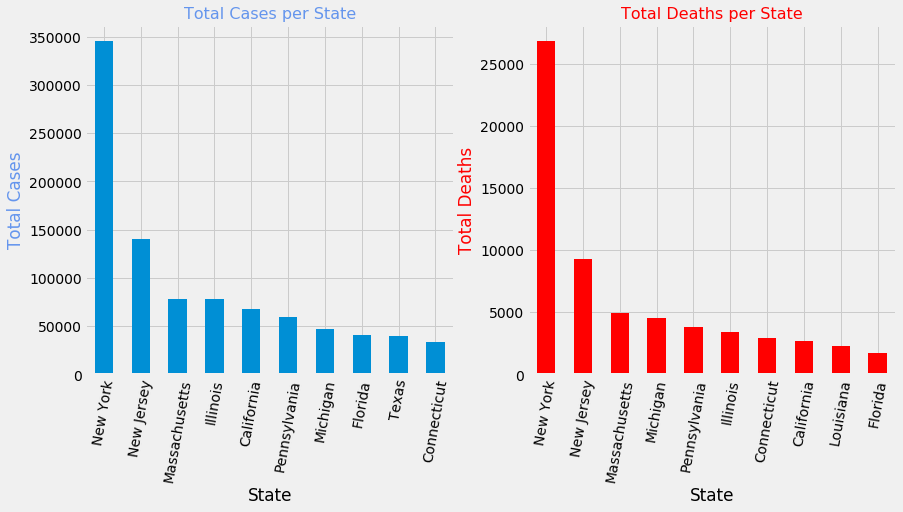

In [72]:
plt.figure(figsize= (20, 6))

# Total cases
plt.subplot(1,3, 1)
usa["total_cases"].head(10).plot.bar()
plt.xticks(rotation = 80)
plt.xlabel('State')
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.title('Total Cases per State', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
usa.total_deaths.sort_values(ascending = False)[:10].plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.xlabel('State')
plt.ylabel('Total Deaths', color = 'r')
plt.title('Total Deaths per State', fontsize= 16, color = 'r');